In [123]:
import pandas as pd

In [124]:
df = pd.read_csv('/content/RR_Accident_Weather_Data.csv')

In [125]:
df.head(10)

,reportingrailroadcode,accidentnumber,date,time,accidenttype,hazmatreleasedcars,station,stateabbr,temperature,visibility_code,...,trainspeed,equipmentdamagecost,trackdamagecost,totaldamagecost,primaryaccidentcausecode,latitude,longitude,prior_temp,actual_temp,following_temp
0,CSX,000178042,8/7/2018,10:51 AM,Derailment,0,BUFFALO,NY,73,2,...,6,19801,1440,21241,T001,42.901973,-78.773441,79.3,75.1,72.4
1,CSX,000182665,4/30/2019,12:25 AM,Derailment,0,MILLBURY,OH,42,4,...,7,21848,1017,22865,T111,41.544006,-83.485654,44.3,45.5,56.6
2,CSX,000138406,12/3/2014,11:45 PM,Derailment,0,PARMA,OH,35,4,...,7,20456,500,20956,T110,41.406978,-81.787482,30.0,34.7,30.4
3,CSX,000188525,2/19/2020,8:44 AM,Derailment,0,CINCINNATI,OH,25,2,...,0,84949,0,625123,T207,39.125335,-84.540044,48.2,34.9,29.7
4,CSX,000175393,3/24/2018,10:53 AM,Derailment,0,LIMA,OH,36,2,...,7,115993,0,196239,T311,40.745354,-84.101095,33.6,31.3,31.8
5,BNSF,RD0421108,4/19/2021,11:35 AM,Derailment,0,MADILL,OK,60,2,...,8,10082,2000,12082,T112,34.073920,-96.757836,52.3,56.0,46.5
6,AB,DR16001,4/12/2016,12:45 PM,Derailment,0,KENT,OH,65,2,...,5,1631,34073,42561,T110,41.246653,-81.365650,51.5,40.4,41.0
7,CSX,000156748,2/2/2016,11:20 PM,Derailment,0,FOSTORIA,OH,29,4,...,6,22003,15000,37003,T205,41.152943,-83.414598,39.7,38.2,49.1
8,BNSF,SF0716100,7/3/2016,8:15 PM,Derailment,0,ST LOUIS,MO,70,3,...,3,14940,120000,134940,T210,38.605448,-90.310731,66.6,66.9,74.7
9,SLWC,160602002,6/2/2016,7:30 AM,Derailment,0,TULSA,OK,75,1,...,8,12592,0,52592,T110,36.160462,-95.984322,73.4,72.9,73.5


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   reportingrailroadcode     4595 non-null   object 
 1   accidentnumber            4595 non-null   object 
 2   date                      4595 non-null   object 
 3   time                      4595 non-null   object 
 4   accidenttype              4595 non-null   object 
 5   hazmatreleasedcars        4595 non-null   int64  
 6   station                   4595 non-null   object 
 7   stateabbr                 4595 non-null   object 
 8   temperature               4595 non-null   int64  
 9   visibility_code           4595 non-null   int64  
 10  visibility                4595 non-null   object 
 11  weathercondition          4595 non-null   object 
 12  tracktype                 4595 non-null   object 
 13  equipmenttype             4303 non-null   object 
 14  trainspe

In [127]:
df.shape

(4595, 24)

In [128]:
columns_to_drop = ['temperature']
# Drop the specified columns from the DataFrame
df = df.drop(columns_to_drop, axis=1)

In [129]:
df.shape

(4595, 23)

In [130]:
df = df.drop_duplicates(subset=['accidentnumber'], keep='first')

In [131]:
df.shape

(4446, 23)

In [132]:
# 149 Duplicate Accident numbers found, removed duplicates keeping the first

In [133]:
df.isnull().sum()

,0
reportingrailroadcode,0
accidentnumber,0
date,0
time,0
accidenttype,0
hazmatreleasedcars,0
station,0
stateabbr,0
visibility_code,0
visibility,0


In [134]:
# Approx 6.54% missing values --> Explore equipment type

In [135]:
df['equipmenttype'].value_counts()

,count
equipmenttype,
Freight Train,2458
Yard/switching,1142
Light loco(s),209
EMU,99
Passenger Train - Pulling,73
Cut of cars,47
Commuter Train - Pulling,44
Work train,26
Commuter Train - Pushing,22


In [136]:
# Count the number of accidents for each equipment type as a percentage
equipment_accident_percent = df['equipmenttype'].value_counts(normalize=True) * 100

# Display the results
print("Percentage of accidents reported by equipment type:")
print(equipment_accident_percent)


Percentage of accidents reported by equipment type:
equipmenttype
Freight Train                59.157641
Yard/switching               27.484958
Light loco(s)                 5.030084
EMU                           2.382671
Passenger Train - Pulling     1.756919
Cut of cars                   1.131167
Commuter Train - Pulling      1.058965
Work train                    0.625752
Commuter Train - Pushing      0.529483
Single Car                    0.481348
Spec. MoW Equip.              0.240674
Passenger Train - Pushing     0.072202
Maint./inspect Car            0.048135
Name: proportion, dtype: float64


In [137]:
# equipment type: Freight Train and Yard/switching together comprise of around 87% of the accident cases.
# Missing values for equipment type can be imputed based on this distribution, or can be dropped altogether from the data
# since it's less than 10%

In [138]:
df = df.dropna()

In [139]:
df.shape

(4155, 23)

In [140]:
# convert date and time to correct format

In [141]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%I:%M %p').dt.time

In [142]:
df.head(10)

,reportingrailroadcode,accidentnumber,date,time,accidenttype,hazmatreleasedcars,station,stateabbr,visibility_code,visibility,...,trainspeed,equipmentdamagecost,trackdamagecost,totaldamagecost,primaryaccidentcausecode,latitude,longitude,prior_temp,actual_temp,following_temp
0,CSX,000178042,2018-08-07,10:51:00,Derailment,0,BUFFALO,NY,2,Day,...,6,19801,1440,21241,T001,42.901973,-78.773441,79.3,75.1,72.4
1,CSX,000182665,2019-04-30,00:25:00,Derailment,0,MILLBURY,OH,4,Dark,...,7,21848,1017,22865,T111,41.544006,-83.485654,44.3,45.5,56.6
2,CSX,000138406,2014-12-03,23:45:00,Derailment,0,PARMA,OH,4,Dark,...,7,20456,500,20956,T110,41.406978,-81.787482,30.0,34.7,30.4
3,CSX,000188525,2020-02-19,08:44:00,Derailment,0,CINCINNATI,OH,2,Day,...,0,84949,0,625123,T207,39.125335,-84.540044,48.2,34.9,29.7
4,CSX,000175393,2018-03-24,10:53:00,Derailment,0,LIMA,OH,2,Day,...,7,115993,0,196239,T311,40.745354,-84.101095,33.6,31.3,31.8
5,BNSF,RD0421108,2021-04-19,11:35:00,Derailment,0,MADILL,OK,2,Day,...,8,10082,2000,12082,T112,34.073920,-96.757836,52.3,56.0,46.5
6,AB,DR16001,2016-04-12,12:45:00,Derailment,0,KENT,OH,2,Day,...,5,1631,34073,42561,T110,41.246653,-81.365650,51.5,40.4,41.0
7,CSX,000156748,2016-02-02,23:20:00,Derailment,0,FOSTORIA,OH,4,Dark,...,6,22003,15000,37003,T205,41.152943,-83.414598,39.7,38.2,49.1
8,BNSF,SF0716100,2016-07-03,20:15:00,Derailment,0,ST LOUIS,MO,3,Dusk,...,3,14940,120000,134940,T210,38.605448,-90.310731,66.6,66.9,74.7
9,SLWC,160602002,2016-06-02,07:30:00,Derailment,0,TULSA,OK,1,Dawn,...,8,12592,0,52592,T110,36.160462,-95.984322,73.4,72.9,73.5


In [143]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
reportingrailroadcode,4155,283,UP,1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accidentnumber,4155,4155,000178042,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,4155,NaN,NaN,NaN,2019-06-04 04:04:19.927797760,2014-10-19 00:00:00,2016-12-31 00:00:00,2019-03-27 00:00:00,2021-10-24 00:00:00,2024-07-30 00:00:00,NaN
time,4155,1001,10:30:00,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accidenttype,4155,8,Derailment,3930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hazmatreleasedcars,4155.0,NaN,NaN,NaN,0.03201,0.0,0.0,0.0,0.0,28.0,0.55309
station,4155,1666,KANSAS CITY,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stateabbr,4155,49,TX,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visibility_code,4155.0,NaN,NaN,NaN,2.659206,1.0,2.0,2.0,4.0,4.0,1.034717
visibility,4155,4,Day,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4155 entries, 0 to 4593
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   reportingrailroadcode     4155 non-null   object        
 1   accidentnumber            4155 non-null   object        
 2   date                      4155 non-null   datetime64[ns]
 3   time                      4155 non-null   object        
 4   accidenttype              4155 non-null   object        
 5   hazmatreleasedcars        4155 non-null   int64         
 6   station                   4155 non-null   object        
 7   stateabbr                 4155 non-null   object        
 8   visibility_code           4155 non-null   int64         
 9   visibility                4155 non-null   object        
 10  weathercondition          4155 non-null   object        
 11  tracktype                 4155 non-null   object        
 12  equipmenttype            

In [145]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set up the matplotlib figure with appropriate size
# plt.figure(figsize=(15, 10))

# # List of categorical columns to analyze
# categorical_columns = ['reportingrailroadcode']

# # Loop through each categorical column and create a bar plot
# for i, col in enumerate(categorical_columns, 1):
#     plt.subplot(3, 2, i)  # Adjust layout based on number of columns
#     sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
#     plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()


In [146]:
# import matplotlib.pyplot as plt

# # Get the top 10 reporting railroad codes with their counts
# top_10_railroad_codes = df['reportingrailroadcode'].value_counts().nlargest(10)

# # Calculate the percentage distribution
# top_10_railroad_percent = (top_10_railroad_codes / top_10_railroad_codes.sum()) * 100

# # Plotting the donut chart
# plt.figure(figsize=(12, 12))
# plt.pie(top_10_railroad_percent, labels=top_10_railroad_percent.index, autopct='%1.1f%%', startangle=140)
# # Create a white circle at the center for the "donut" effect
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# plt.gca().add_artist(centre_circle)

# # Add title
# plt.title('Top 10 Reporting Railroad Codes - Percentage Distribution')
# plt.show()


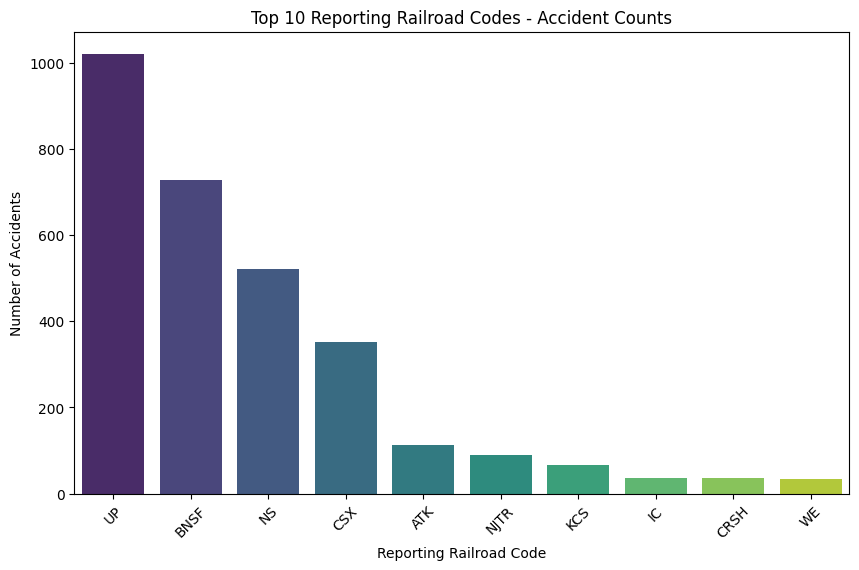

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 reporting railroad codes with their counts
top_10_railroad_codes = df['reportingrailroadcode'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('Reporting Railroad Code')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Reporting Railroad Codes - Accident Counts')
plt.xticks(rotation=45)
plt.show()


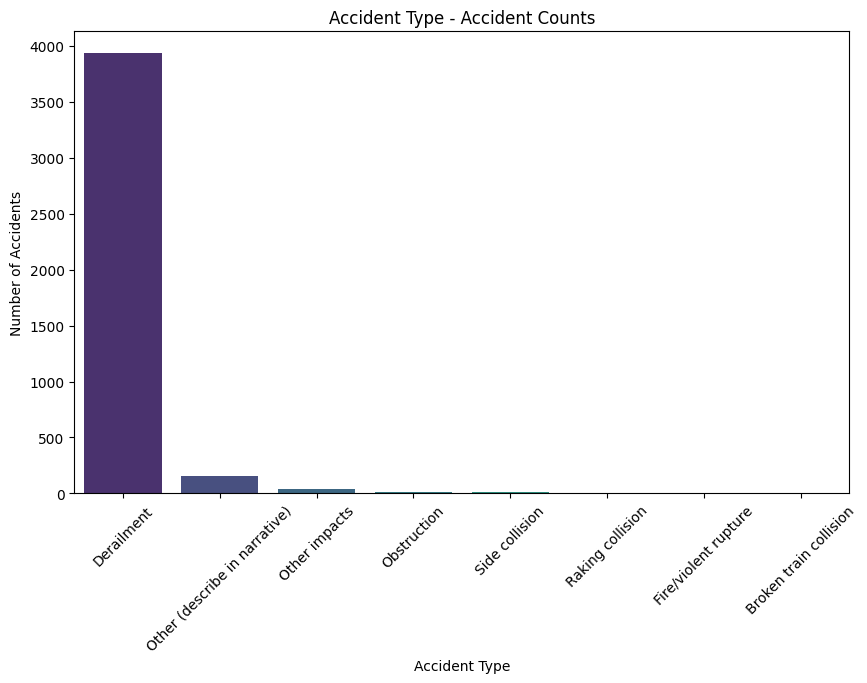

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 accidenttype with their counts
top_10_railroad_codes = df['accidenttype'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('Accident Type')
plt.ylabel('Number of Accidents')
plt.title('Accident Type - Accident Counts')
plt.xticks(rotation=45)
plt.show()


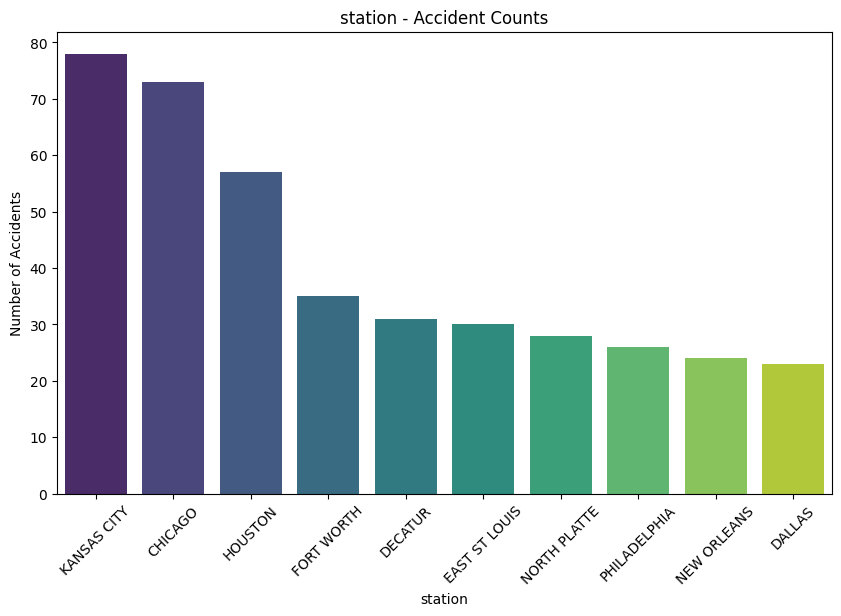

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 station with their counts
top_10_railroad_codes = df['station'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('station')
plt.ylabel('Number of Accidents')
plt.title('station - Accident Counts')
plt.xticks(rotation=45)
plt.show()


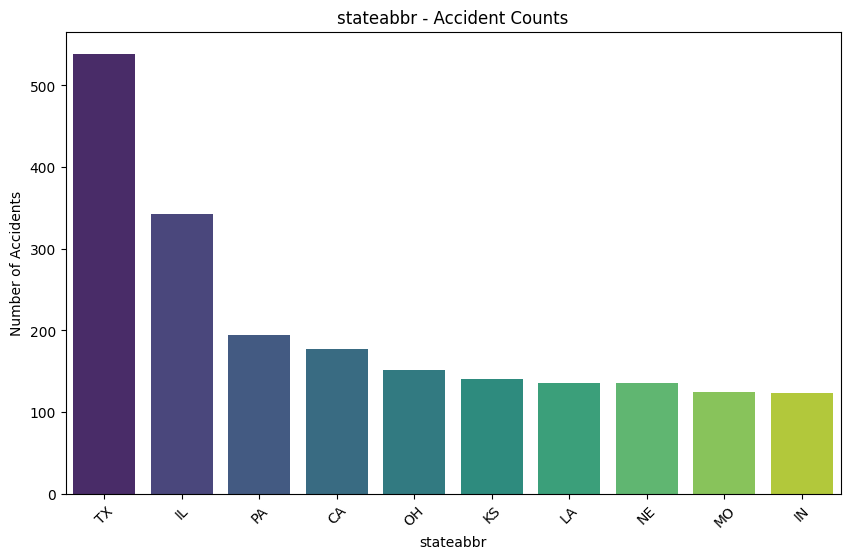

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 stateabbr with their counts
top_10_railroad_codes = df['stateabbr'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('stateabbr')
plt.ylabel('Number of Accidents')
plt.title('stateabbr - Accident Counts')
plt.xticks(rotation=45)
plt.show()


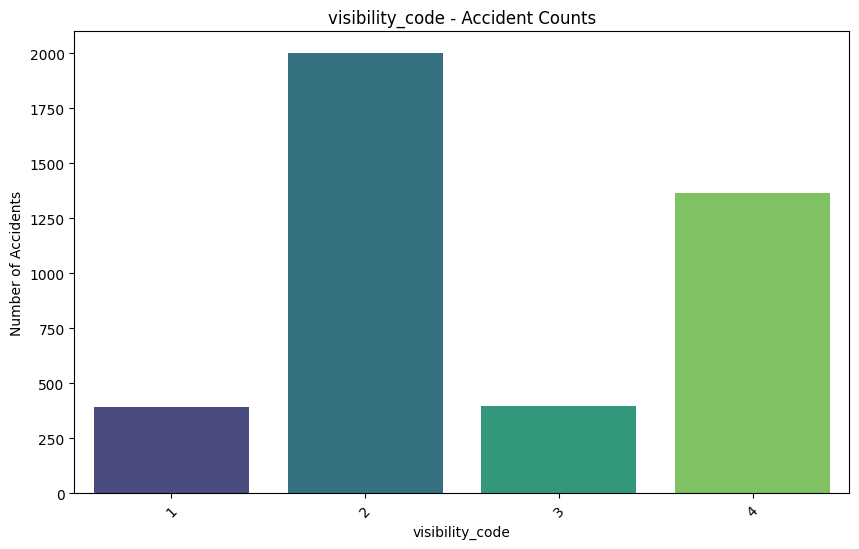

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 visibility_code with their counts
top_10_railroad_codes = df['visibility_code'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('visibility_code')
plt.ylabel('Number of Accidents')
plt.title('visibility_code - Accident Counts')
plt.xticks(rotation=45)
plt.show()


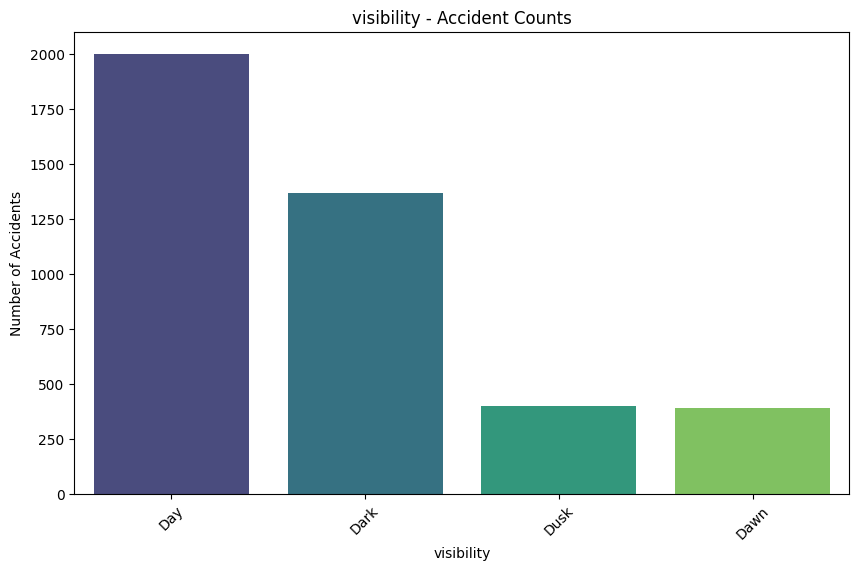

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 visibility with their counts
top_10_railroad_codes = df['visibility'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('visibility')
plt.ylabel('Number of Accidents')
plt.title('visibility - Accident Counts')
plt.xticks(rotation=45)
plt.show()


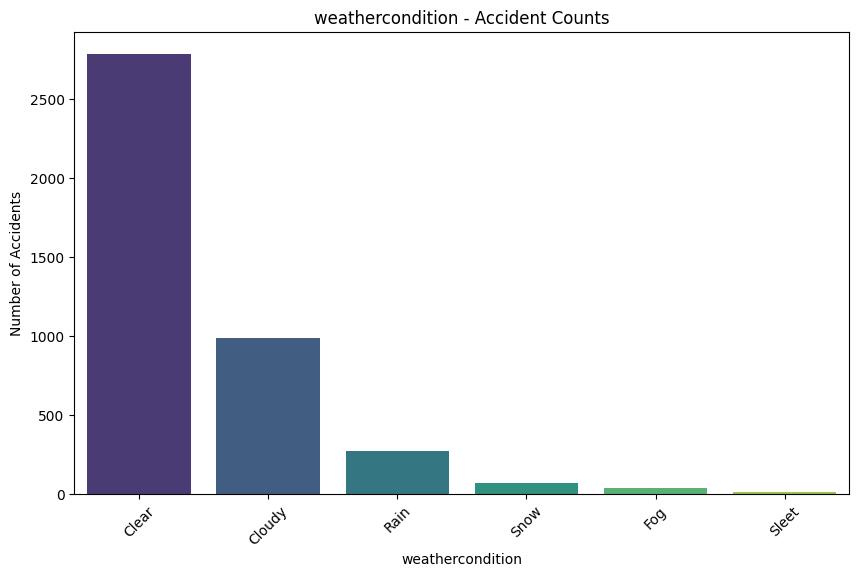

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 weathercondition with their counts
top_10_railroad_codes = df['weathercondition'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('weathercondition')
plt.ylabel('Number of Accidents')
plt.title('weathercondition - Accident Counts')
plt.xticks(rotation=45)
plt.show()


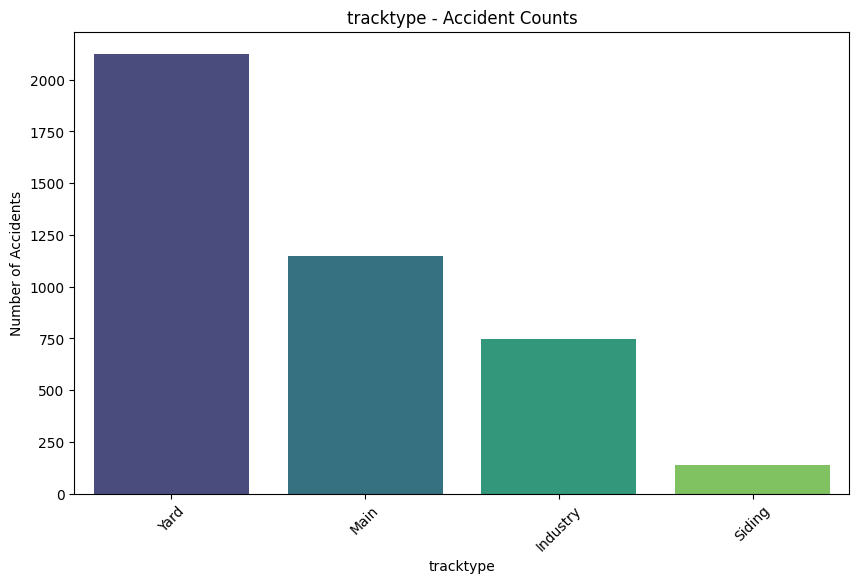

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 tracktype with their counts
top_10_railroad_codes = df['tracktype'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('tracktype')
plt.ylabel('Number of Accidents')
plt.title('tracktype - Accident Counts')
plt.xticks(rotation=45)
plt.show()


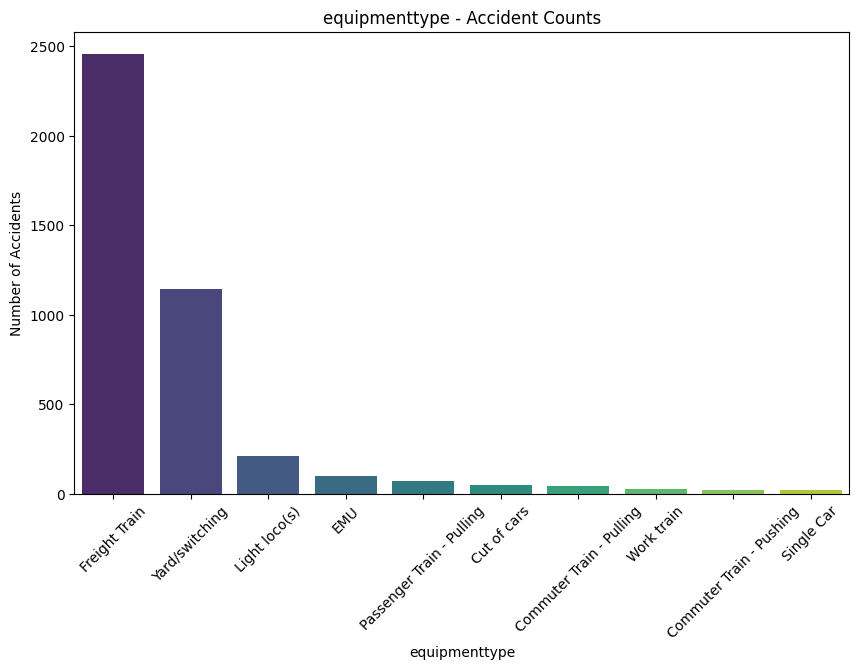

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 equipmenttype with their counts
top_10_railroad_codes = df['equipmenttype'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('equipmenttype')
plt.ylabel('Number of Accidents')
plt.title('equipmenttype - Accident Counts')
plt.xticks(rotation=45)
plt.show()


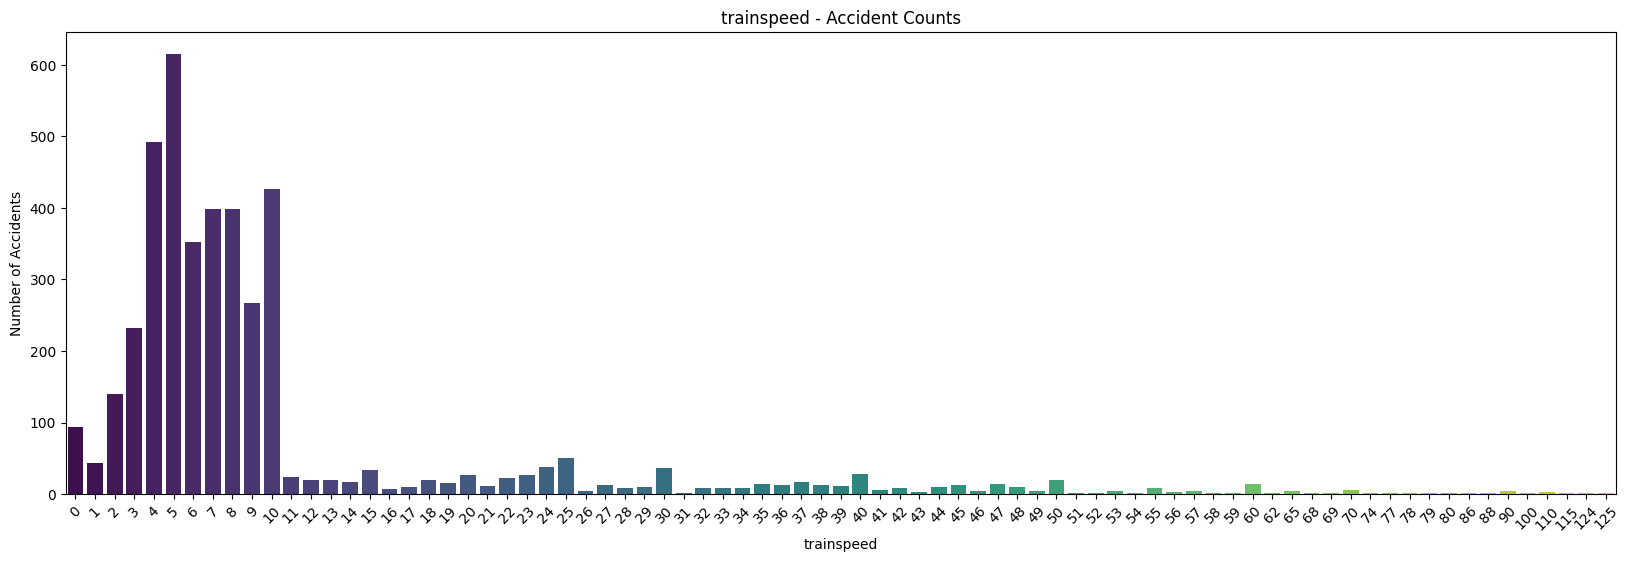

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 trainspeed with their counts
top_10_railroad_codes = df['trainspeed'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('trainspeed')
plt.ylabel('Number of Accidents')
plt.title('trainspeed - Accident Counts')
plt.xticks(rotation=45)
plt.show()


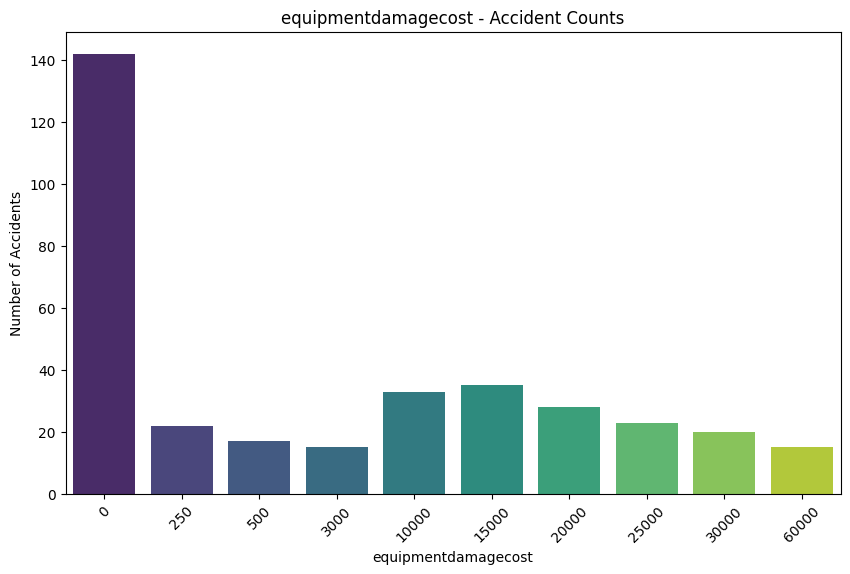

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 equipmentdamagecost with their counts
top_10_railroad_codes = df['equipmentdamagecost'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('equipmentdamagecost')
plt.ylabel('Number of Accidents')
plt.title('equipmentdamagecost - Accident Counts')
plt.xticks(rotation=45)
plt.show()


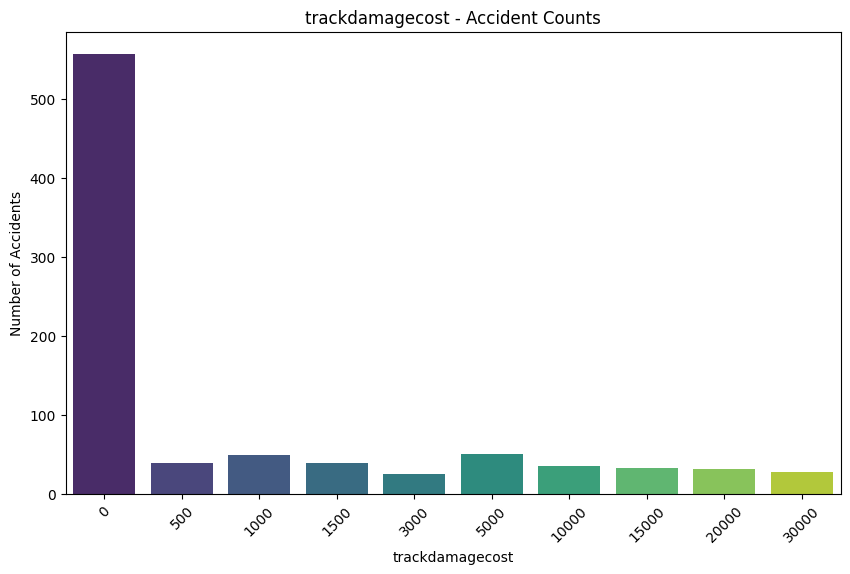

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 trackdamagecost with their counts
top_10_railroad_codes = df['trackdamagecost'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('trackdamagecost')
plt.ylabel('Number of Accidents')
plt.title('trackdamagecost - Accident Counts')
plt.xticks(rotation=45)
plt.show()


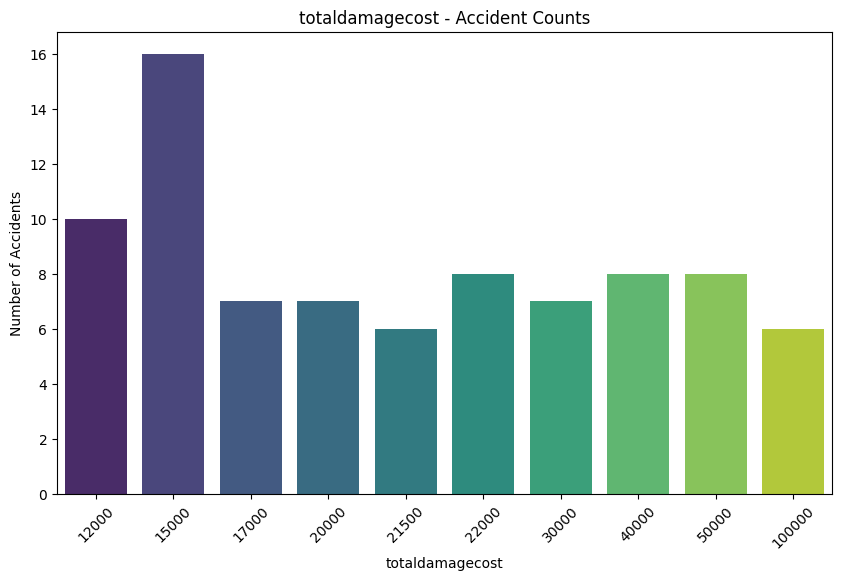

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 totaldamagecost with their counts
top_10_railroad_codes = df['totaldamagecost'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('totaldamagecost')
plt.ylabel('Number of Accidents')
plt.title('totaldamagecost - Accident Counts')
plt.xticks(rotation=45)
plt.show()


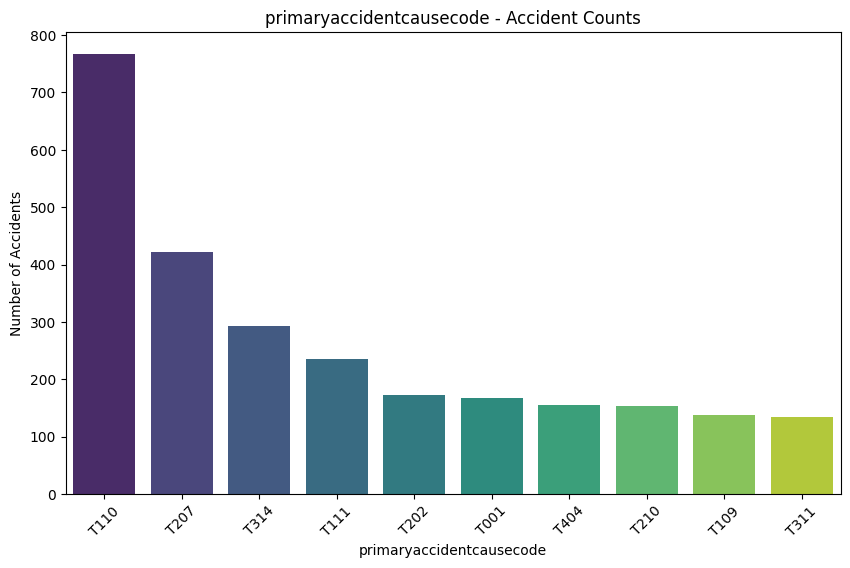

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 primaryaccidentcausecode with their counts
top_10_railroad_codes = df['primaryaccidentcausecode'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('primaryaccidentcausecode')
plt.ylabel('Number of Accidents')
plt.title('primaryaccidentcausecode - Accident Counts')
plt.xticks(rotation=45)
plt.show()


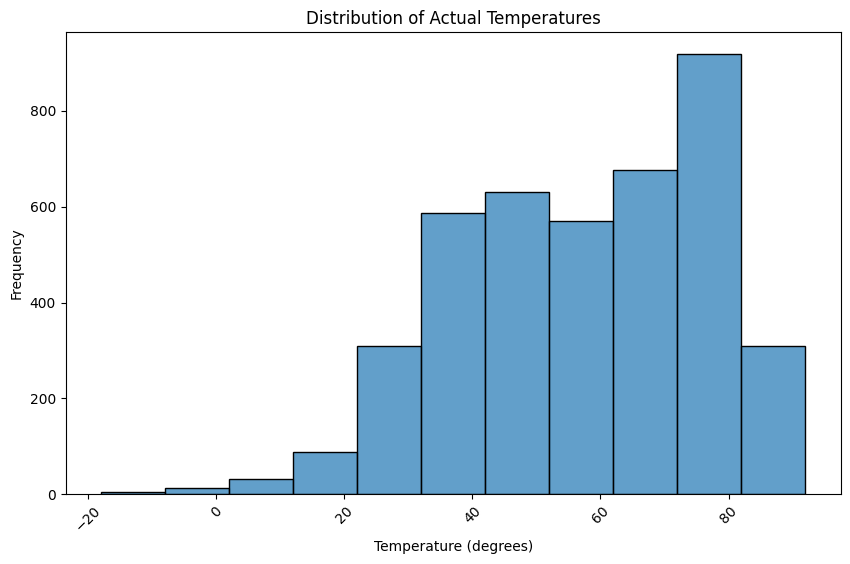

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'actual_temp' is your temperature column

# Ensure integers for bin edges (round or cast to int)
min_temp = int(min(df['actual_temp']))
max_temp = int(max(df['actual_temp'])) + 1  # Add 1 to include the upper bound

# Create bins of 10 degrees (adjust bin size as needed)
bins = range(min_temp, max_temp, 10)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_temp'], bins=bins, edgecolor='k', alpha=0.7)

# Add labels and title
plt.xlabel('Temperature (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Temperatures')
plt.xticks(rotation=45)
plt.show()

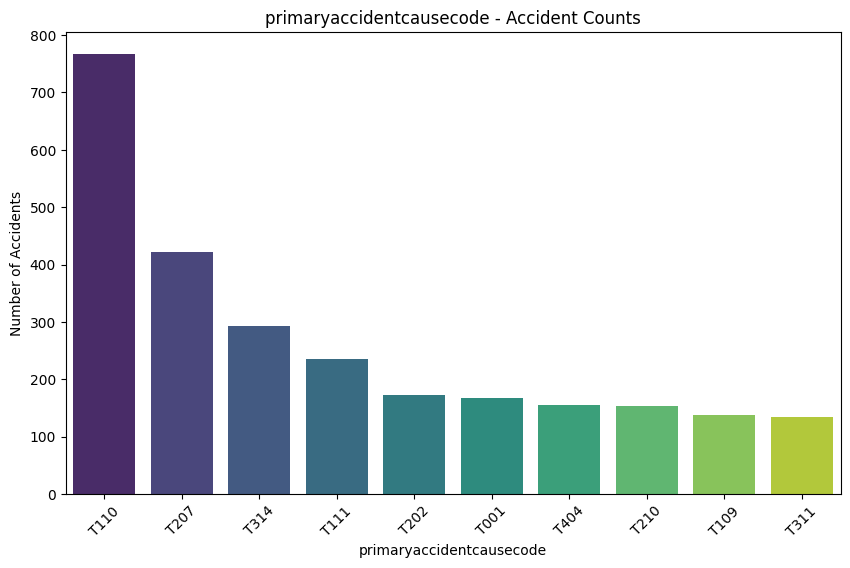

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 primaryaccidentcausecode with their counts
top_10_railroad_codes = df['primaryaccidentcausecode'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('primaryaccidentcausecode')
plt.ylabel('Number of Accidents')
plt.title('primaryaccidentcausecode - Accident Counts')
plt.xticks(rotation=45)
plt.show()


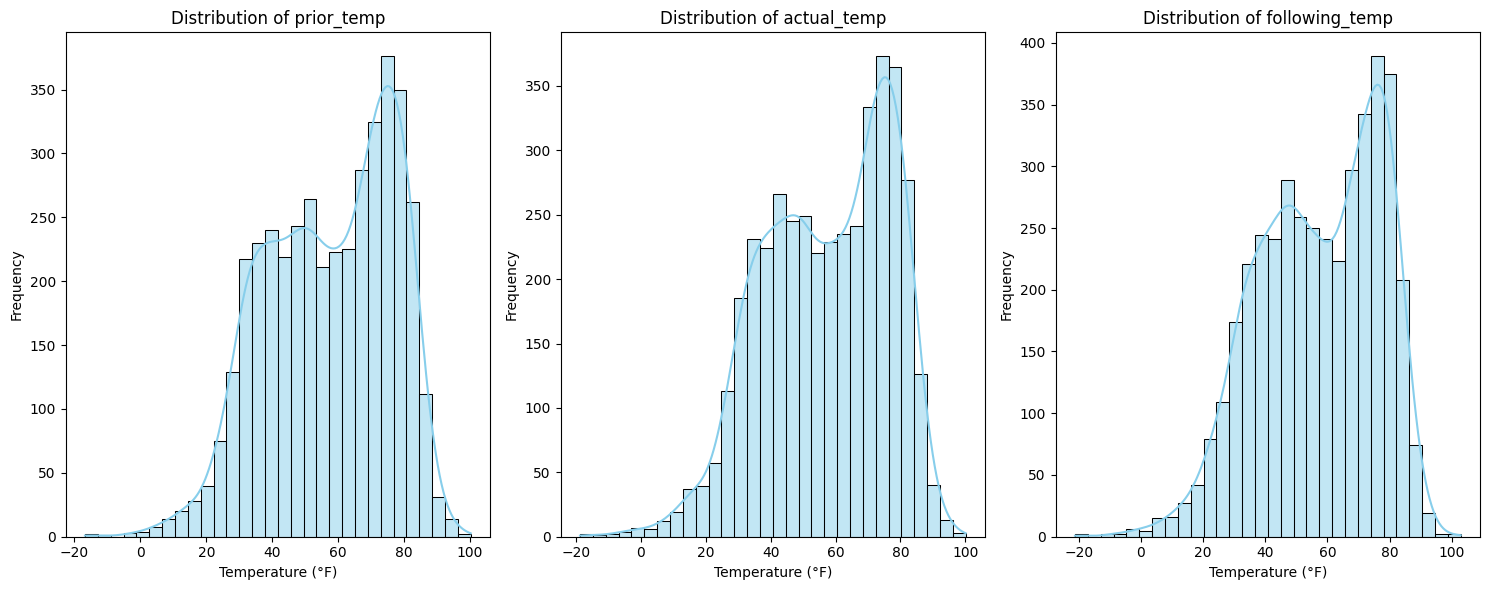

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# List of temperature columns to analyze
temperature_columns = ['prior_temp', 'actual_temp', 'following_temp']

# Loop through each temperature column and create a histogram with KDE
for i, col in enumerate(temperature_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [164]:
# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Define a function to map each month to a season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(month_to_season)

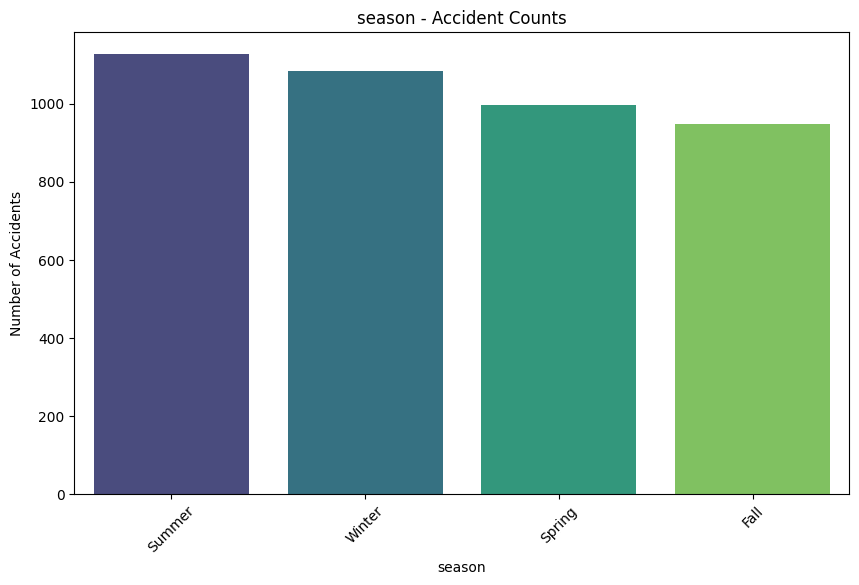

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 season with their counts
top_10_railroad_codes = df['season'].value_counts()
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_railroad_codes.index, y=top_10_railroad_codes.values, palette='viridis')

# Add labels and title
plt.xlabel('season')
plt.ylabel('Number of Accidents')
plt.title('season - Accident Counts')
plt.xticks(rotation=45)
plt.show()


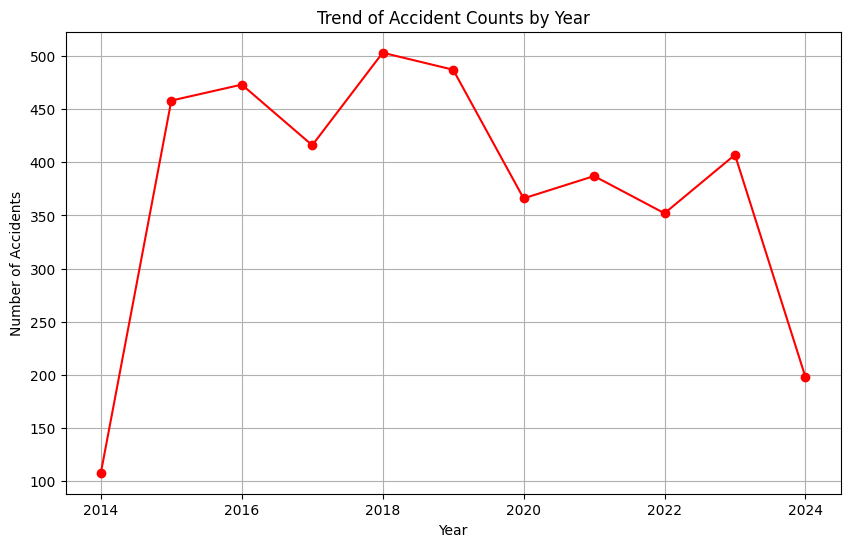

In [166]:
# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and count accidents
yearly_accident_counts = df.groupby('year')['accidentnumber'].count()

# Plotting the trend over years
plt.figure(figsize=(10, 6))
plt.plot(yearly_accident_counts.index, yearly_accident_counts.values, marker='o', color='red', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Accident Counts by Year')
plt.grid(True)
plt.show()

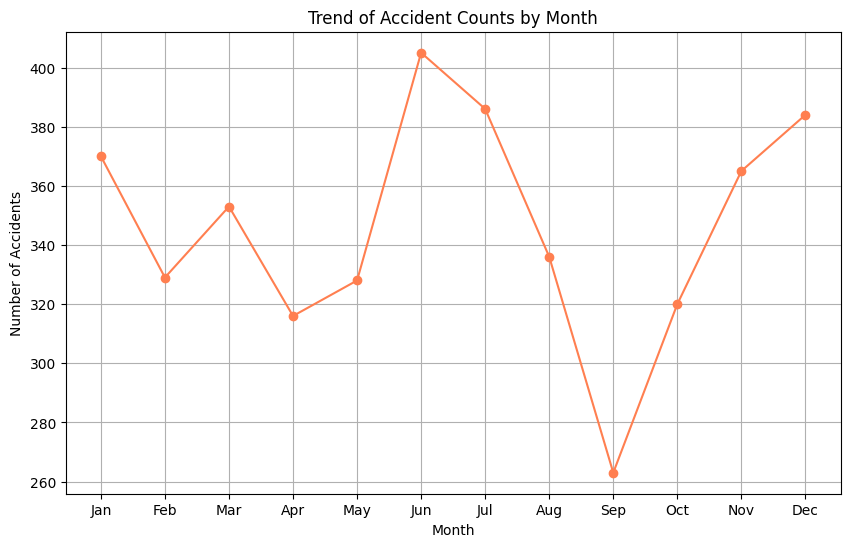

In [167]:
# Group by month and count accidents
monthly_accident_counts = df.groupby('month')['accidentnumber'].count()

# Plotting the trend by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_accident_counts.index, monthly_accident_counts.values, marker='o', color='coral', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Trend of Accident Counts by Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

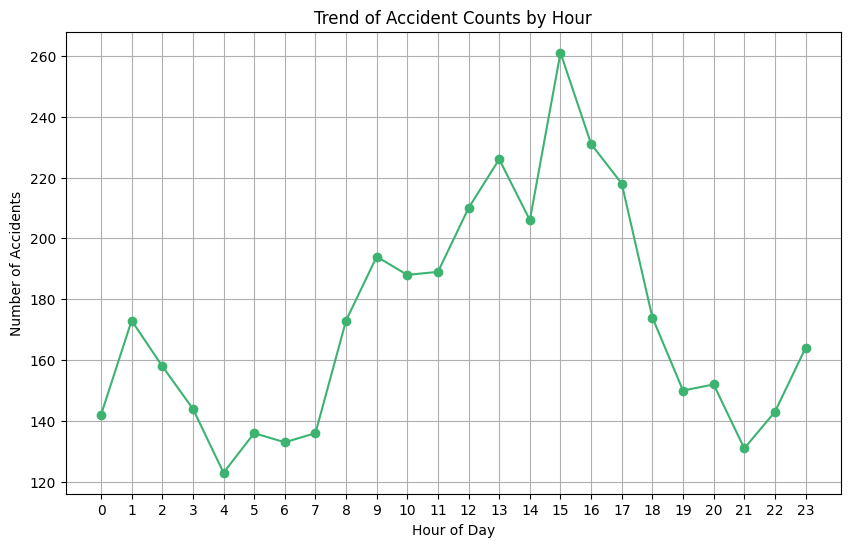

In [168]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'time' is in datetime format with the correct 24-hour format
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Extract the hour from the 'time' column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Group by hour and count accidents
hourly_accident_counts = df.groupby('hour')['accidentnumber'].count()

# Plotting the trend by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_accident_counts.index, hourly_accident_counts.values, marker='o', color='mediumseagreen', linestyle='-')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Trend of Accident Counts by Hour')
plt.xticks(ticks=range(0, 24))  # Setting x-axis ticks for each hour (0-23)
plt.grid(True)
plt.show()


In [169]:
# !pip install folium

In [170]:
# import folium

# # Create a map centered around the average coordinates
# map_center = [df['latitude'].mean(), df['longitude'].mean()]
# accident_map = folium.Map(location=map_center, zoom_start=6)

# # Add accident locations as markers on the map
# for lat, lon in zip(df['latitude'], df['longitude']):
#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=3,  # size of the marker
#         color='red',  # color of the marker
#         fill=True,
#         fill_color='red',
#         fill_opacity=0.5
#     ).add_to(accident_map)

# # Display the map
# accident_map.save('accident_locations_map.html')


# Time Series for Number of Accidents - Month

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Grouping by daily accidents
daily_accidents = df.groupby('date').size().reset_index(name='Number_of_Accidents')

# Grouping by monthly accidents
monthly_accidents = df.groupby(df['date'].dt.to_period('M')).size().reset_index(name='Number_of_Accidents')

# Convert the PeriodIndex back to a datetime for monthly_accidents
monthly_accidents['date'] = monthly_accidents['date'].dt.to_timestamp()

In [172]:
# Create a time series with 'date' as the index and 'Number_of_Accidents' as the values
monthly_accidents_ts = pd.Series(
    monthly_accidents['Number_of_Accidents'].values,
    index=monthly_accidents['date'],
    name='Number_of_Accidents'
)

# Display the time series
print(monthly_accidents_ts.head())

date
2014-10-01    17
2014-11-01    44
2014-12-01    47
2015-01-01    54
2015-02-01    35
Name: Number_of_Accidents, dtype: int64


In [173]:
# Ensure the index is a DatetimeIndex
monthly_accidents_ts = pd.Series(
    monthly_accidents['Number_of_Accidents'].values,
    index=pd.to_datetime(monthly_accidents['date']),
    name='Number_of_Accidents'
)


In [174]:
# Generate a full range of months
full_index = pd.date_range(
    start=monthly_accidents['date'].min(),
    end=monthly_accidents['date'].max(),
    freq='MS'  # Use 'MS' for Month-Start instead of 'ME'
)

# Reindex the series
monthly_accidents_ts = monthly_accidents_ts.reindex(full_index, fill_value=0)


In [175]:
print(f"Number of missing values after reindexing: {monthly_accidents_ts.isnull().sum()}")


Number of missing values after reindexing: 0


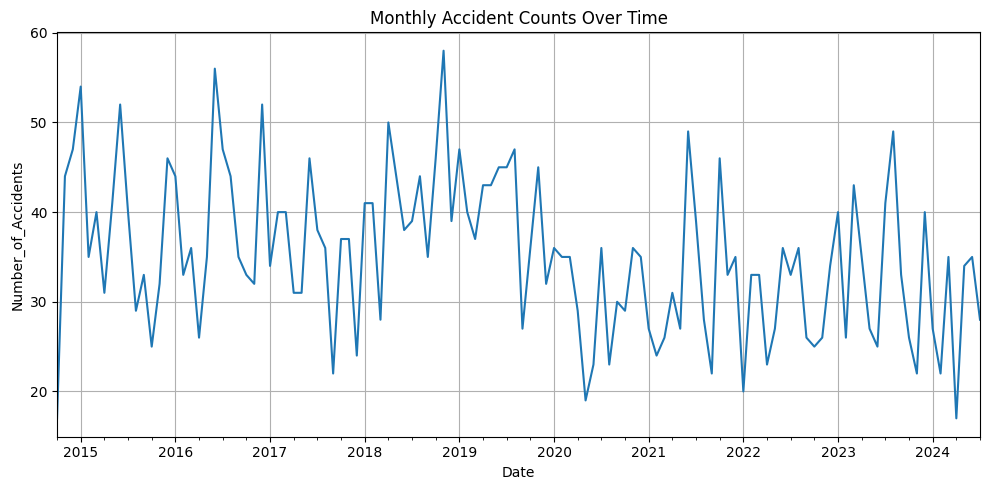

In [176]:
# Plot the time series
plt.figure(figsize=(10, 5))
monthly_accidents_ts.plot()
plt.title("Monthly Accident Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number_of_Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()


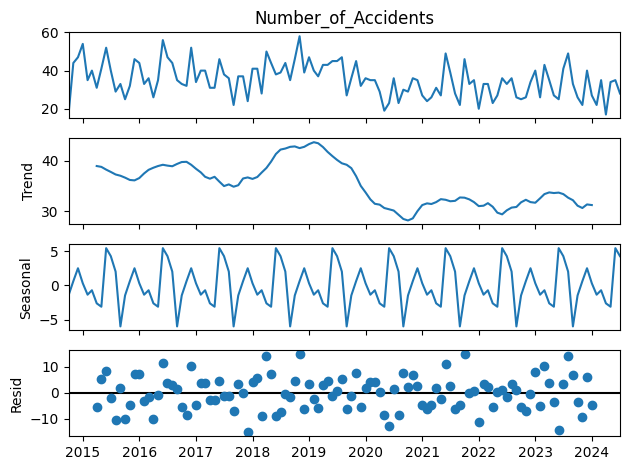

In [177]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(monthly_accidents_ts, model='additive', period=12)

# This will create a single decomposition plot with 4 subplots
sd.plot()
plt.show()

In [178]:
# Data partition for the time series data
# Keep the last two years data as the validation dataset
nValid = 24
nTrain = len(monthly_accidents_ts) - nValid
train_ts = monthly_accidents_ts[:nTrain]
valid_ts = monthly_accidents_ts[nTrain:]

In [179]:
# Model 1: A linear trend time series model
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
# Add a trend term to the time series
ts_df = tsatools.add_trend(monthly_accidents_ts,trend='ct')
# Add a month variable to the time series
ts_df['Month']=ts_df.index.month
nValid = 24
nTrain = len(monthly_accidents_ts) - nValid
train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]
wine_lm = sm.ols(formula='Number_of_Accidents ~ trend',data=train_df).fit()

In [180]:
ts_df

,Number_of_Accidents,const,trend,Month
2014-10-01,17,1.0,1.0,10
2014-11-01,44,1.0,2.0,11
2014-12-01,47,1.0,3.0,12
2015-01-01,54,1.0,4.0,1
2015-02-01,35,1.0,5.0,2
...,...,...,...,...
2024-03-01,35,1.0,114.0,3
2024-04-01,17,1.0,115.0,4
2024-05-01,34,1.0,116.0,5
2024-06-01,35,1.0,117.0,6


In [181]:
# Display the linear regression model result
wine_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number_of_Accidents   R-squared:                       0.084
Model:                             OLS   Adj. R-squared:                  0.074
Method:                  Least Squares   F-statistic:                     8.465
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):            0.00454
Time:                         02:30:15   Log-Likelihood:                -332.44
No. Observations:                   94   AIC:                             668.9
Df Residuals:                       92   BIC:                             674.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6156      1.747     23.249      0.000      37.146      44.085
trend         -0.0929      0.032     -2.909      0.005      -0.156      -0.029
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.046
Skew:                           0.026   Prob(JB):                        0.977
Kurtosis:                       2.905   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
valid_df.shape

(24, 4)

In [183]:
# Evaluate Model1 performance
# In-sample prediction
# Use the linear regression model to predict the training data
train_lm_pred = wine_lm.predict(train_df)
# Out-of-sample prediction
# Use the linear regression model to predict the validation data
valid_lm_pred = wine_lm.predict(valid_df)

In [184]:
import numpy as np

# User-defined function to calculate the RMSE, R-square, and MAE, and MAPE
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

def rsquared(actual, predicted):
    return 1 - np.sum((actual - predicted) ** 2) / np.sum((actual - actual.mean()) ** 2)

def mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100


# Create a dictionary with performance metrics
def model_performance(actual, predicted):
    return {
        'RMSE': rmse(actual, predicted),
        'R-squared': rsquared(actual, predicted),
        'MAE': mae(actual, predicted),
        'MAPE': mape(actual, predicted)
    }

model1_train_perf = model_performance(train_ts, train_lm_pred)
model1_valid_perf = model_performance(valid_ts, valid_lm_pred)
print(pd.DataFrame({'Train': model1_train_perf, 'Validation': model1_valid_perf}))

               Train  Validation
RMSE        8.311529    7.601105
R-squared   0.084260    0.004802
MAE         6.613227    6.583333
MAPE       20.360396   22.047722


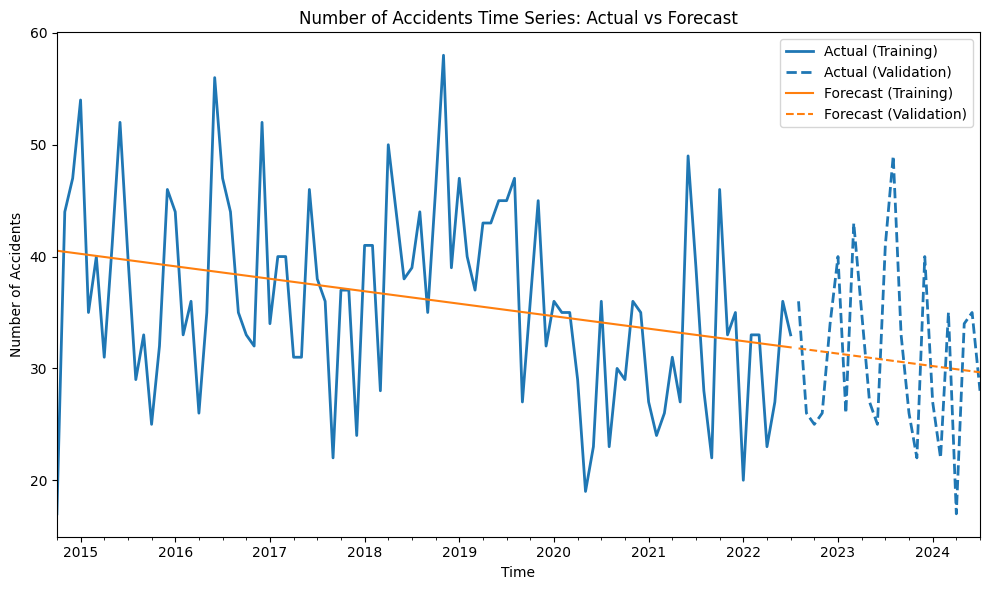

In [185]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot original time series data
train_ts.plot(color='C0', linewidth=2, label='Actual (Training)')
valid_ts.plot(color='C0', linewidth=2, linestyle='dashed', label='Actual (Validation)')

# Plot the forecasted data
train_lm_pred.plot(color='C1', label='Forecast (Training)')
valid_lm_pred.plot(color='C1', linestyle='dashed', label='Forecast (Validation)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Time Series: Actual vs Forecast')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [186]:
# Model 2: An additive seasonality model
wine_lm_season = sm.ols(formula='Number_of_Accidents ~ C(Month)',data=train_df).fit()
wine_lm_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number_of_Accidents   R-squared:                       0.173
Model:                             OLS   Adj. R-squared:                  0.063
Method:                  Least Squares   F-statistic:                     1.564
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):              0.125
Time:                         02:30:16   Log-Likelihood:                -327.62
No. Observations:                   94   AIC:                             679.2
Df Residuals:                       82   BIC:                             709.8
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.8750      2.989     12.671      0.000      31.929      43.821
C(Month)[T.2]     -2.7500      4.227     -0.651      0.517     -11.159       5.659
C(Month)[T.3]     -3.5000      4.227     -0.828      0.410     -11.909       4.909
C(Month)[T.4]     -4.8750      4.227     -1.153      0.252     -13.284       3.534
C(Month)[T.5]     -4.5000      4.227     -1.065      0.290     -12.909       3.909
C(Month)[T.6]      5.2500      4.227      1.242      0.218      -3.159      13.659
C(Month)[T.7]      1.7500      4.227      0.414      0.680      -6.659      10.159
C(Month)[T.8]     -2.0179      4.376     -0.461      0.646     -10.722       6.687
C(Month)[T.9]     -8.7321      4.376     -1.996      0.049     -17.437      -0.028
C(Month)[T.10]    -4.2500      4.227     -1.005      0.318     -12.659       4.159
C(Month)[T.11]     1.7500      4.227      0.414      0.680      -6.659      10.159
C(Month)[T.12]     0.8750      4.227      0.207      0.837      -7.534       9.284
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.262
Skew:                          -0.055   Prob(JB):                        0.877
Kurtosis:                       2.766   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
# Evaluate Model2 performance
# In-sample prediction
train_pred_season = wine_lm_season.predict(train_df)
# Out-of-sample prediction
valid_pred_season = wine_lm_season.predict(valid_df)

In [188]:
# Calculate the performance metrics for Model2
model2_train_perf = model_performance(train_ts, train_pred_season)
model2_valid_perf = model_performance(valid_ts, valid_pred_season)

print(pd.DataFrame({'Train': model2_train_perf, 'Validation': model2_valid_perf}))

               Train  Validation
RMSE        7.896413    9.434280
R-squared   0.173448   -0.533111
MAE         6.380319    7.605655
MAPE       19.554335   28.853819


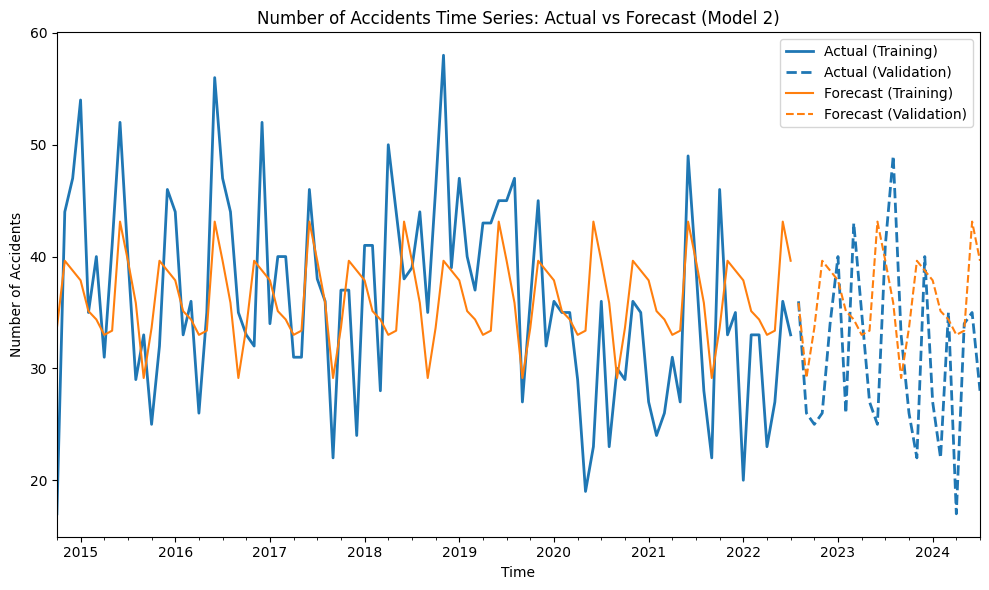

In [189]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot original time series data
train_ts.plot(color='C0', linewidth=2, label='Actual (Training)')
valid_ts.plot(color='C0', linewidth=2, linestyle='dashed', label='Actual (Validation)')

# Plot the forecasted data from Model 2
train_pred_season.plot(color='C1', label='Forecast (Training)')
valid_pred_season.plot(color='C1', linestyle='dashed', label='Forecast (Validation)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Time Series: Actual vs Forecast (Model 2)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [190]:
# Model 3: A model with linear trend and seasonality
modelfomula = 'Number_of_Accidents ~ trend + C(Month)'
wine_lm_trendseason = sm.ols(formula=modelfomula, data=train_df).fit()
wine_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number_of_Accidents   R-squared:                       0.262
Model:                             OLS   Adj. R-squared:                  0.152
Method:                  Least Squares   F-statistic:                     2.393
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):             0.0106
Time:                         02:30:16   Log-Likelihood:                -322.31
No. Observations:                   94   AIC:                             670.6
Df Residuals:                       81   BIC:                             703.7
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         42.2721      3.174     13.319      0.000      35.957      48.587
C(Month)[T.2]     -2.6544      4.020     -0.660      0.511     -10.652       5.344
C(Month)[T.3]     -3.3088      4.020     -0.823      0.413     -11.307       4.690
C(Month)[T.4]     -4.5882      4.021     -1.141      0.257     -12.588       3.412
C(Month)[T.5]     -4.1176      4.021     -1.024      0.309     -12.119       3.884
C(Month)[T.6]      5.7279      4.023      1.424      0.158      -2.276      13.732
C(Month)[T.7]      2.3235      4.024      0.577      0.565      -5.683      10.330
C(Month)[T.8]     -1.9223      4.161     -0.462      0.645     -10.201       6.356
C(Month)[T.9]     -8.5410      4.161     -2.053      0.043     -16.820      -0.262
C(Month)[T.10]    -4.5368      4.021     -1.128      0.262     -12.537       3.463
C(Month)[T.11]     1.5588      4.020      0.388      0.699      -6.440       9.557
C(Month)[T.12]     0.7794      4.020      0.194      0.847      -7.219       8.777
trend             -0.0956      0.031     -3.113      0.003      -0.157      -0.034
==============================================================================
Omnibus:                        0.726   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.297
Skew:                          -0.061   Prob(JB):                        0.862
Kurtosis:                       3.247   Cond. No.                         675.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
# Evaluate Model3 performance
# In-sample prediction
train_pred_trendseason = wine_lm_trendseason.predict(train_df)

# Out-of-sample prediction
valid_pred_trendseason = wine_lm_trendseason.predict(valid_df)


In [192]:
# Calculate the performance metrics for Model3
model3_train_perf = model_performance(train_ts, train_pred_trendseason)
model3_valid_perf = model_performance(valid_ts, valid_pred_trendseason)

print(pd.DataFrame({'Train': model3_train_perf, 'Validation': model3_valid_perf}))

               Train  Validation
RMSE        7.462616    8.049191
R-squared   0.261768   -0.115991
MAE         5.818925    6.756740
MAPE       17.895916   22.369283


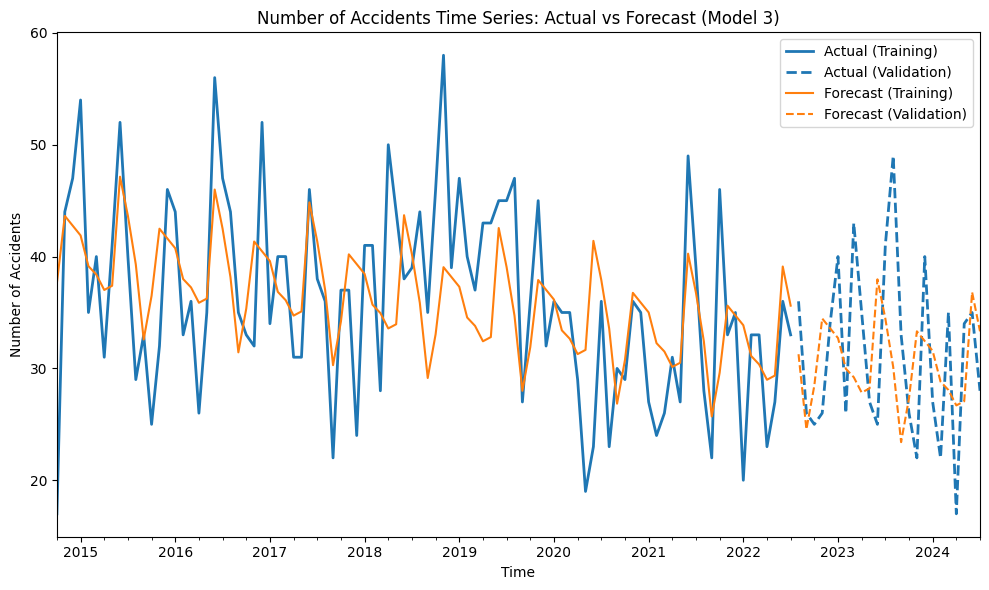

In [193]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot original time series data
train_ts.plot(color='C0', linewidth=2, label='Actual (Training)')
valid_ts.plot(color='C0', linewidth=2, linestyle='dashed', label='Actual (Validation)')

# Plot the forecasted data from Model 2
train_pred_trendseason.plot(color='C1', label='Forecast (Training)')
valid_pred_trendseason.plot(color='C1', linestyle='dashed', label='Forecast (Validation)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Time Series: Actual vs Forecast (Model 3)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [194]:
# Model 4: Simple exponential smoothing
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.h
from statsmodels.tsa.api import SimpleExpSmoothing
SES = SimpleExpSmoothing(train_ts, initialization_method='estimated').fit()
predict_SES = SES.forecast(len(valid_ts))

In [195]:
SES.model.params

{'smoothing_level': 0.12369732612914514,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 37.87982276289557,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [196]:
# Evaluate Model4 performance
# In-sample prediction
train_pred_SES = SES.fittedvalues

# Out-of-sample prediction
valid_pred_SES = SES.forecast(len(valid_ts))


In [197]:
# Calculate the performance metrics for Model4
model4_train_perf = model_performance(train_ts, train_pred_SES)
model4_valid_perf = model_performance(valid_ts, valid_pred_SES)

print(pd.DataFrame({'Train': model4_train_perf, 'Validation': model4_valid_perf}))

               Train  Validation
RMSE        8.391900    7.619460
R-squared   0.066464   -0.000011
MAE         6.640911    6.583333
MAPE       20.530091   22.528403


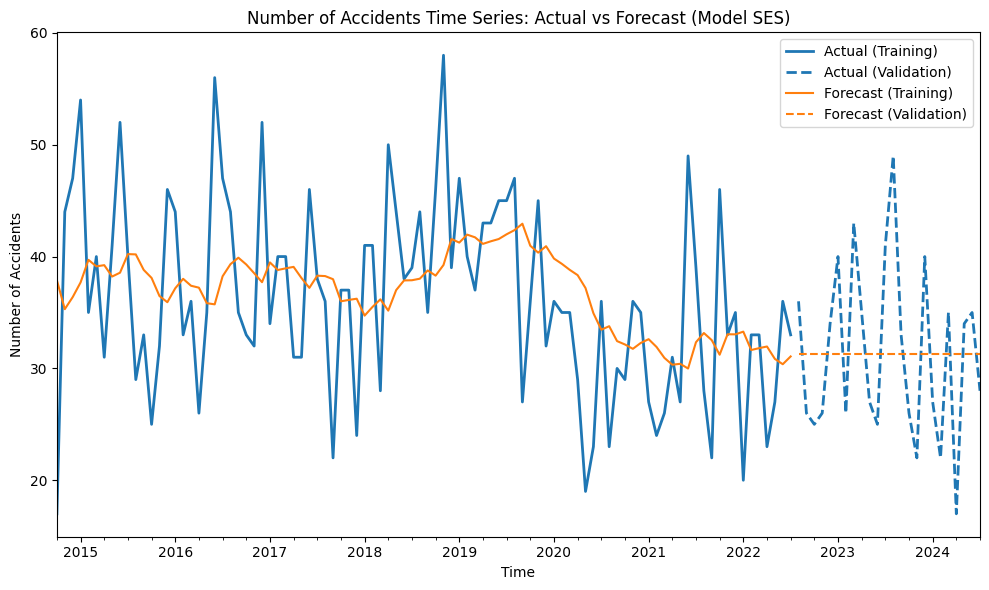

In [198]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot original time series data
train_ts.plot(color='C0', linewidth=2, label='Actual (Training)')
valid_ts.plot(color='C0', linewidth=2, linestyle='dashed', label='Actual (Validation)')

# Plot the forecasted data from Model 2
train_pred_SES.plot(color='C1', label='Forecast (Training)')
valid_pred_SES.plot(color='C1', linestyle='dashed', label='Forecast (Validation)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Time Series: Actual vs Forecast (Model SES)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [199]:
# Dickey-Fuller Test to verify whether a time-series is stationary
# p-vlaue: insignificance indicating non-stationary
# Test Statistic > Critical Value: non-stationary

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_accidents_ts,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value', '#lags used', 'Number of observations Used'])

for key , value in dftest[4].items(): dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                  -2.091552
p-value                          0.247925
#lags used                       5.000000
Number of observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


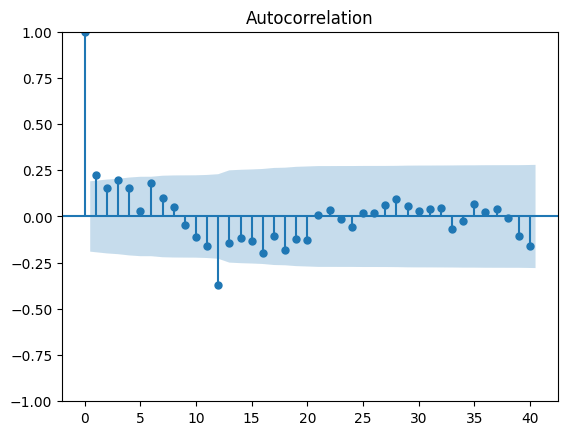

In [200]:
# Plot ACF to check potential seasonality
# ACF: autocorrelation factor
import statsmodels.tsa.api as smt
monthly_accidents_ts_diff = monthly_accidents_ts.diff(periods=12)
monthly_accidents_ts_diff.dropna(inplace=True)
smt.graphics.plot_acf(monthly_accidents_ts_diff, lags=40, alpha= 0.05)
plt.show()

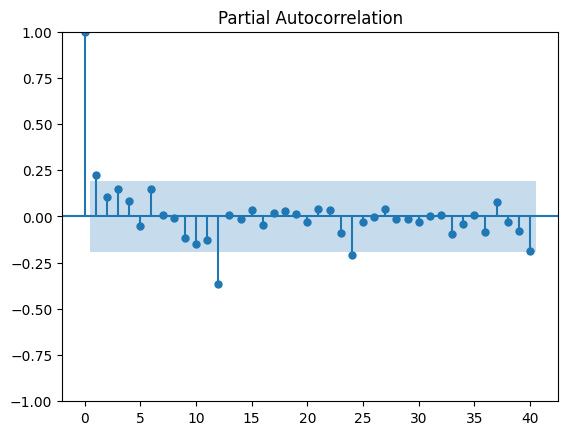

In [201]:
# Plot PACF to check potential seasonality
# PACF: partial autocorrelation factor
smt.graphics.plot_pacf(monthly_accidents_ts_diff, lags=40, alpha=0.05)
plt.show()

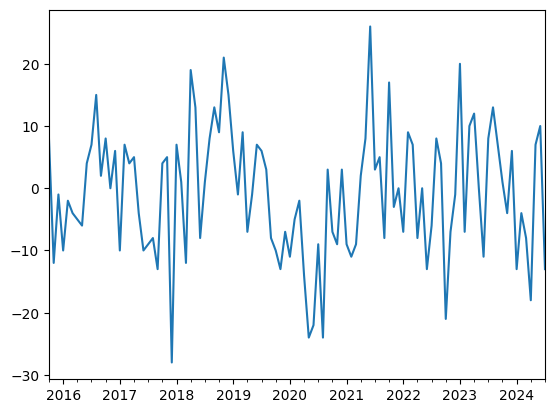

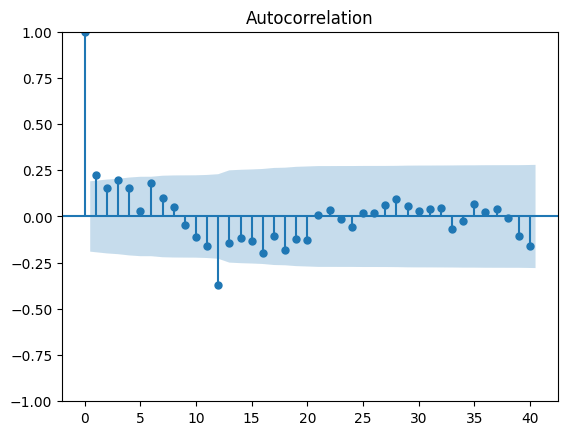

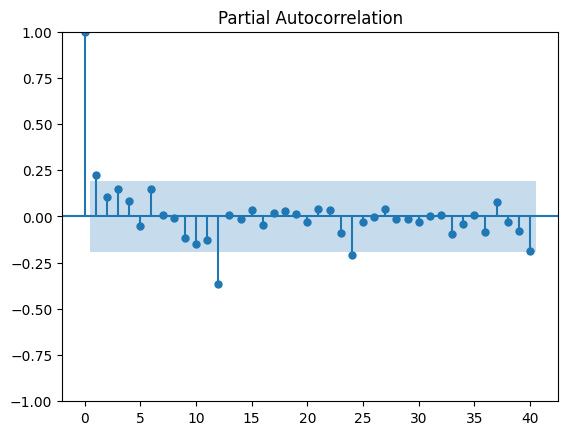

In [202]:
# Seasonal differencing applied to the time series data will remove the seasonality from the time series data
deseason_monthly_accidents_ts = monthly_accidents_ts.diff(12).dropna()
# Plot the deseasonalized time series data
deseason_monthly_accidents_ts.plot()

# ACF and PACF plots
smt.graphics.plot_acf(deseason_monthly_accidents_ts, lags=40)
smt.graphics.plot_pacf(deseason_monthly_accidents_ts, lags=40)
plt.show()

In [203]:
# To identify the best fit SARIMA model
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,3)
# Generate all possible combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all possible combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p, d, q))]
# Display p, d and q combinations
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [204]:
# Display seasonal p, d and q combinations
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [205]:
import sys
# Specify to ignore warning messages
import warnings
warnings.filterwarnings("ignore")
# Set up the initial values
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [116]:
import statsmodels.api as sm
# Using loops to search for the best ARIMA model
# Choose the best ARIMA model based on minimum AIC values
# AIC: to balance the model between goodness-of-fit and number of parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)
            results = temp_model.fit(disp=False) # Fit the model and avoid displaying convergence warnings

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal

        except:
            continue
    print("Tried SARIMAX{}x{}12 model - AIC:{}".format(param, param_seasonal, results.aic))
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Tried SARIMAX(0, 0, 0)x(2, 2, 2, 12)12 model - AIC:558.7617790548345
Best SARIMAX(0, 0, 0)x(0, 2, 2, 12)12 model - AIC:555.1888246589879
Tried SARIMAX(0, 0, 1)x(2, 2, 2, 12)12 model - AIC:558.2578438618701
Best SARIMAX(0, 0, 1)x(0, 2, 2, 12)12 model - AIC:554.5985045439155
Tried SARIMAX(0, 0, 2)x(2, 2, 2, 12)12 model - AIC:558.628156683882
Best SARIMAX(0, 0, 1)x(0, 2, 2, 12)12 model - AIC:554.5985045439155
Tried SARIMAX(0, 1, 0)x(2, 2, 2, 12)12 model - AIC:580.5495192419794
Best SARIMAX(0, 0, 1)x(0, 2, 2, 12)12 model - AIC:554.5985045439155
Tried SARIMAX(0, 1, 1)x(2, 2, 2, 12)12 model - AIC:550.7603704958926
Best SARIMAX(0, 1, 1)x(0, 2, 2, 12)12 model - AIC:546.8166413131423
Tried SARIMAX(0, 1, 2)x(2, 2, 2, 12)12 model - AIC:552.2804917098288
Best SARIMAX(0, 1, 1)x(0, 2, 2, 12)12 model - AIC:546.8166413131423
Tried SARIMAX(0, 2, 0)x(2, 2, 2, 12)12 model - AIC:647.0658652276136
Best SARIMAX(0, 1, 1)x(0, 2, 2, 12)12 model - AIC:546.8166413131423
Tried SARIMAX(0, 2, 1)x(2, 2, 2, 12)12 mod

In [208]:
import statsmodels.api as sm

# Display best ARIMA model detailed results
best_model = sm.tsa.SARIMAX(train_ts,
                             order=(0,1,1),
                             seasonal_order=(0,2,2,12),
                             enforce_stationarity=True,
                             enforce_invertibility=True)

best_results = best_model.fit(disp=False)

# Print the summary of the best model
print(best_results.summary())


                                        SARIMAX Results                                        
Dep. Variable:                     Number_of_Accidents   No. Observations:                   94
Model:             SARIMAX(0, 1, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -269.408
Date:                                 Fri, 22 Nov 2024   AIC                            546.817
Time:                                         02:32:31   BIC                            555.753
Sample:                                     10-01-2014   HQIC                           550.362
                                          - 07-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7443      0.093     -7.979      0.000      -0.927      -0

In [209]:
# Display coefficients for the AR & MA components
# sigma square: variance of residuals
print(best_results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                     Number_of_Accidents   No. Observations:                   94
Model:             SARIMAX(0, 1, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -269.408
Date:                                 Fri, 22 Nov 2024   AIC                            546.817
Time:                                         02:32:35   BIC                            555.753
Sample:                                     10-01-2014   HQIC                           550.362
                                          - 07-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7443      0.093     -7.979      0.000      -0.927      -0

In [210]:
# Best SARMIA Model Performance
# In-sample prediction
train_pred_best = best_results.predict(start=12, end=train_ts.size-1)

# Out-of-sample prediction
valid_pred_best = best_results.get_forecast(steps=valid_ts.size)


In [211]:
# Calculate the performance metrics for the best SARIMA Model
best_train_perf = model_performance(train_ts[12:], train_pred_best)
best_valid_perf = model_performance(valid_ts, valid_pred_best.predicted_mean)

print(pd.DataFrame({'Train': best_train_perf, 'Validation': best_valid_perf}))


               Train  Validation
RMSE       12.560210   12.740879
R-squared  -1.220337   -1.796115
MAE         9.863932   10.875433
MAPE       29.279479   34.487771


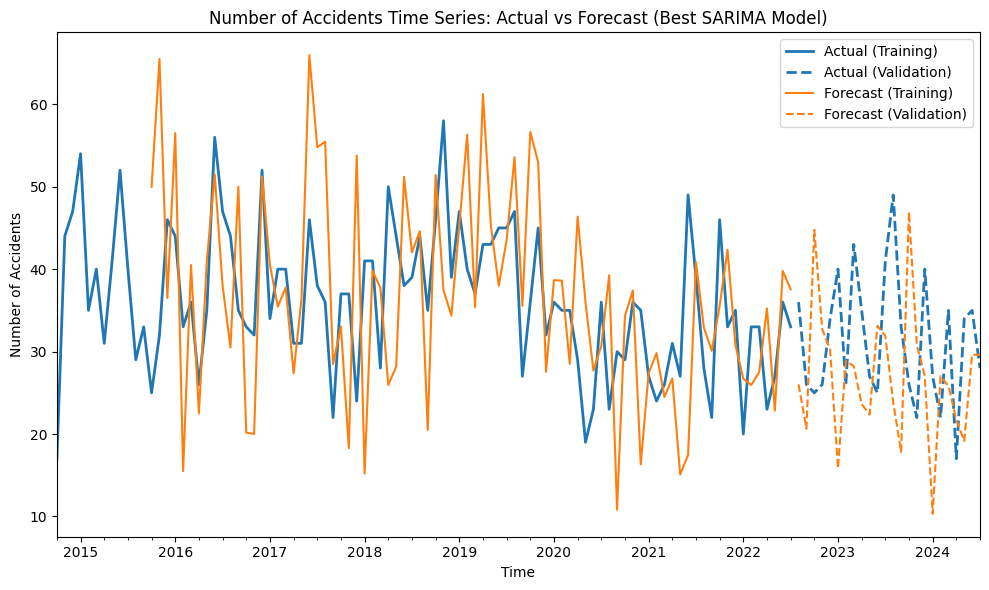

In [212]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot original time series data
train_ts.plot(color='C0', linewidth=2, label='Actual (Training)')
valid_ts.plot(color='C0', linewidth=2, linestyle='dashed', label='Actual (Validation)')

# Plot the forecasted data from the best SARIMA model
train_pred_best.plot(color='C1', label='Forecast (Training)')
valid_pred_best.predicted_mean.plot(color='C1', linestyle='dashed', label='Forecast (Validation)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Time Series: Actual vs Forecast (Best SARIMA Model)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Accident Severity Prediction

**Objective:**
Develop a regression model to predict the total damage cost (totaldamagecost) of a railroad accident. The aim is to estimate the financial impact of accidents based on various contributing factors, helping stakeholders allocate resources effectively and mitigate risks in high-cost scenarios.

Can also be a classification model, if we classify has low medium high brackets


### totaldamage cost has other component as well -> extract that out and create new variable "other cost"

### Can focus on railroad companies - NS, CSX, BNSF, UP or top 5 or top 10